# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Submission Dicoding/Clustering/bank_transactions_dataset.csv')
df.head()

Mounted at /content/drive


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
# Check Nilai pada masing masing kolom kategorikal untuk cek apakah ada nilai yg invalid
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"\nKolom: {df[col].value_counts()}")


Kolom: TransactionID
TX002496    1
TX002495    1
TX002494    1
TX002493    1
TX002492    1
           ..
TX000005    1
TX000004    1
TX000003    1
TX000002    1
TX000001    1
Name: count, Length: 2512, dtype: int64

Kolom: AccountID
AC00460    12
AC00202    12
AC00362    12
AC00363    12
AC00480    11
           ..
AC00008     1
AC00472     1
AC00476     1
AC00038     1
AC00238     1
Name: count, Length: 495, dtype: int64

Kolom: TransactionDate
2023-04-03 16:07:53    1
2023-03-10 17:38:58    1
2023-03-17 16:10:35    1
2023-01-30 17:05:46    1
2023-04-03 16:05:30    1
                      ..
2023-10-16 17:51:24    1
2023-05-05 16:32:11    1
2023-07-10 18:16:08    1
2023-06-27 16:44:19    1
2023-04-11 16:29:14    1
Name: count, Length: 2512, dtype: int64

Kolom: TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

Kolom: Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Philadelphia        67
Tucson              67

In [5]:
pd.set_option('display.max_columns', None)

#pilih data kategorikal
categoric = df.select_dtypes('object')
#pilih data numerik
numeric = df.select_dtypes('number')

#tentukan jumlah baris dan kolom
rows = df.shape[0]
cols = df.shape[1]

print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {cols}")

#cetak summary data kategorikal
print("\nSummary Data Kategorikal: ")
display(categoric.describe().T)

#cetak summary data numerik
print("\nSummary Data Numerik: ")
display(numeric.describe().T)

Jumlah baris: 2512
Jumlah kolom: 16

Summary Data Kategorikal: 


,count,unique,top,freq
TransactionID,2512,2512,TX002496,1
AccountID,2512,495,AC00460,12
TransactionDate,2512,2512,2023-04-03 16:07:53,1
TransactionType,2512,2,Debit,1944
Location,2512,43,Fort Worth,70
DeviceID,2512,681,D000548,9
IP Address,2512,592,200.136.146.93,13
MerchantID,2512,100,M026,45
Channel,2512,3,Branch,868
CustomerOccupation,2512,4,Student,657



Summary Data Numerik: 


,count,mean,std,min,25%,50%,75%,max
TransactionAmount,2512.0,297.593778,291.946243,0.26,81.885,211.14,414.5275,1919.11
CustomerAge,2512.0,44.673965,17.792198,18.00,27.000,45.00,59.0000,80.00
TransactionDuration,2512.0,119.643312,69.963757,10.00,63.000,112.50,161.0000,300.00
LoginAttempts,2512.0,1.124602,0.602662,1.00,1.000,1.00,1.0000,5.00
AccountBalance,2512.0,5114.302966,3900.942499,101.25,1504.370,4735.51,7678.8200,14977.99


####**Insight Statistikal Data Kategorikal:**

Dari 11 kolom pada data kategorikal, jika ditinjau dari jumlah nilai uniknya dan kesesuaian insight datanya, maka Transaction Type, Channel, dan CustomerOccupation adalah kolom yang paling sesuai untuk dilakukan pemodelan.

####**Insight Statistikal Data Numerik:**



**1.   Transaction Amount**

*   Mean: Rata-rata transaksi adalah 297.59.
*   Std: Standar deviasi yang besar sebesar 291.94, menunjukkan adanya variansi signifikan dalam transaksi
*   Min: 0.26. Transaksi terkecil dalam dataset
*   Max: 1919.11. Transaksi terbesar dalam dataset

**2.   Customer Age**

*   Mean: Usia rata-rata pelanggan ialah 44.67 tahun (sekitar 45 tahun)
*   Std: Standar deviasi usia pelanggan sebesar 17.79 tahun. Variansi yang cukup baik dalam transaksi
*   Min: 18 tahun. Usia terkecil pelanggan
*   Max: 80 tahun. Usia tertinggi pelanggan

**3.   Transaction Duration**

*   Mean: 119.64 detik. Rata-rata durasi transaksi yang dilakukan sekitar 2 menit
*   Std: 69.96 detik. Variansi sedikit atau cukup signifikan tetapi masih berlangsung cepat.
*   Min: 10 detik
*   Max: 300 detik. Mungkin beberapa transaksi memerlukan verifikasi tambahan

**4.  Login Attempts**

*   Mean: 1.12. Rata-rata percobaan login sekitar 1 kali
*   Std: 0.6. Standar deviasi relatif kecil.
*   Min: 1.
*   Max: 5. Percobaan login hingga 5 kali mengindikasikan adanya aktivitas mencurigakan seperti Fraud atau mungkin hanya lupa kredensial

**5.   Account Balance**

*   Mean: Rata-rata saldo akun pelanggan 5114.30.
*   Std: 3900.94. Standar deviasi yang cukup besar, menunjukkan adanya variansi besar saldo akun pelanggan dalam data
*   Min: 101.25. Saldo akun pelanggan terkecil
*   Max: 14978. Saldo akun pelanggan terbesar

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Dataset terdiri dari 2512 baris dan 16 kolom. Data tidak memiliki missing value (null), tetapi pada kolom "TransactionDate" dan "PreviousTransactionDate" memiliki kekeliruan tipe data yang seharusnya Datetime.

In [6]:
# Cek jumlah duplikat dan missing value berdasarkan semua kolom
duplicate = df.duplicated()
print(f"Jumlah data duplikat: {duplicate.sum()}")

# Create fungsi untuk check NaN
def check_nan(df):
  null_values = df.isnull().sum()

  #create dataframe utk total null dan persentasenya
  nvc = pd.DataFrame(null_values[null_values > 0].sort_values(), columns=['Total Null Values'])
  nvc['Persentase'] = nvc['Total Null Values']/(df.shape[0]) * 100
  nvc['Data Type'] = [df[i].dtype for i in nvc.index]

  return nvc

result = check_nan(df)
result

Jumlah data duplikat: 0


,Total Null Values,Persentase,Data Type


Data tersebut tidak memiliki nilai duplikasi dan missing value

## Bagaimana bentuk distribusinya? apakah ada outlier?

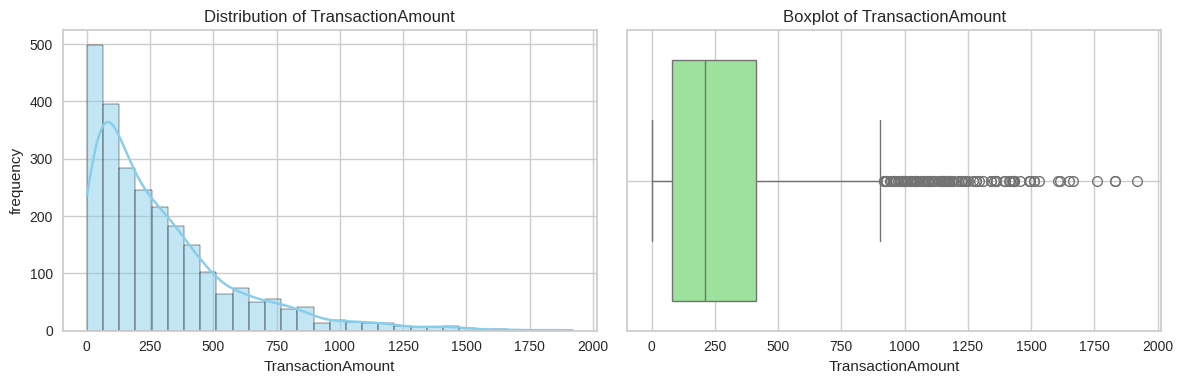

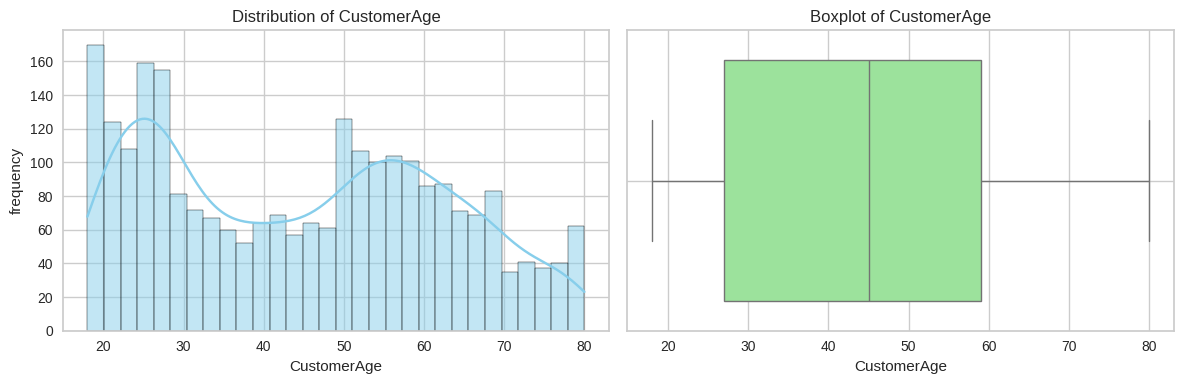

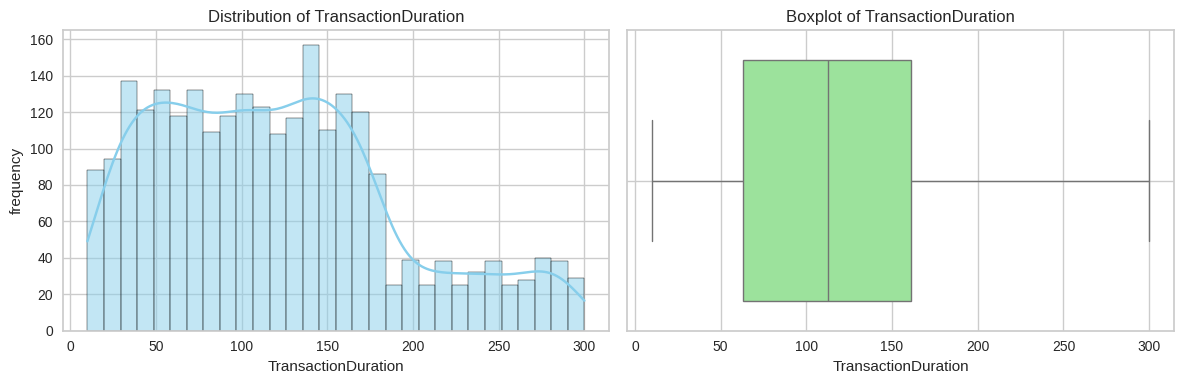

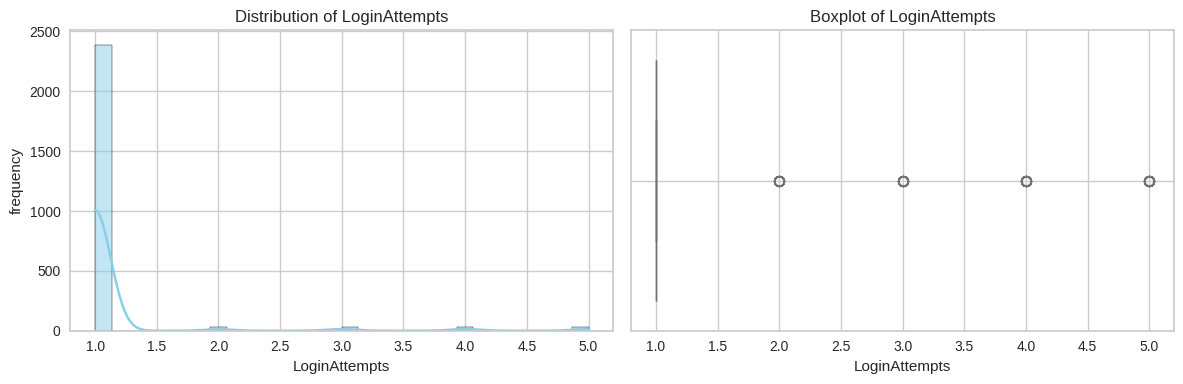

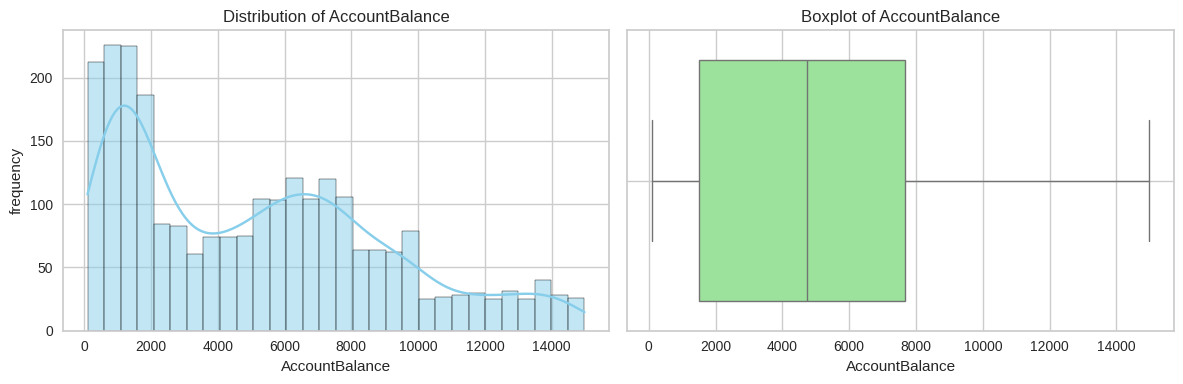

In [7]:
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
for feature in features:
  plt.figure(figsize=(12,4))

  #Histogram
  plt.subplot(1,2,1)
  sns.histplot(x = df[feature], kde=True, bins=30, color='skyblue')
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('frequency')
  plt.grid(True)

  #Boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x = df[feature], color='lightgreen')
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  plt.grid(True)

  plt.tight_layout()
  plt.show()

 ### **Insight:**


**1.   Transaction Amount:**
*   Distribusi data sangat jelas terlihat skewed ke kanan (possitively skewed) yang dimana mayoritas transaksi berada dibawah 500, tetapi beberapa lainnya terdapat hingga 1900.
*   Pada boxplot juga dapat terlihat ekor kanan yang panjang yang menandakan banyak outlier pada data tersebut.


**2.   Customer Age:**
*   Usia pelanggan terdistribusi secara bimodal, yaitu terdapat 2 puncak yang cukup simetri di sekitar usia 22 dan 55 tahun. Ini bisa menandakan dua segmen pelanggan dominan (muda dan dewasa).
*   Sebaran usia cukup lebar, dari 18 sampai 80 tahun, tanpa outlier ekstrem.

**3.   Transaction Duration:**
*   Distribusi durasi transaksi pelanggan cukup simetris meski sedikit miring ke kanan (possitively skewed). Puncak frekuensi berada di rentang 50 sampai 150 detik.
*   Pada boxplot tidak terdapat outlier signifikan, sebagian besar transaksi berlangsung antara 60-170 detik, menunjukkan proses transaksi yang efisien dan stabil.

**4.   Login Attempt:**
*   Plot histogram dan boxplot sangat jelas menunjukkan percobaan login sangat miring ke kanan (positively skewed) bahwa hampir semua percobaan login hanya 1 kali dan sangat sedikit user yang melakukan percobaan login lebih dari 1 kali.
*   Sebagian besar pengguna dapat login tanpa hambatan, namun sejumlah kecil pengguna mungkin mengalami masalah autentikasi (perlu investigasi: lupa password, fraud detection, dsb).

**5.   Account Balance:**
*   Plot histogram dan boxplot terdistribusi miring ke kanan (possitively skewed) dan ekor/tail yang agak panjang di kanan (outlier) yang menunjukkan mayoritas user memiliki saldo relatif rendah dan beberapa memiliki saldo yang cukup sampai sangat besar
*   Terdapat ketimpangan saldo di antara pengguna. Sebagian besar memiliki saldo rendah, namun ada juga klien dengan saldo besar. Mungkin ini menunjukkan diferensiasi segmen: pengguna reguler vs premium.

##Bagaimana distribusi untuk data kategorial?









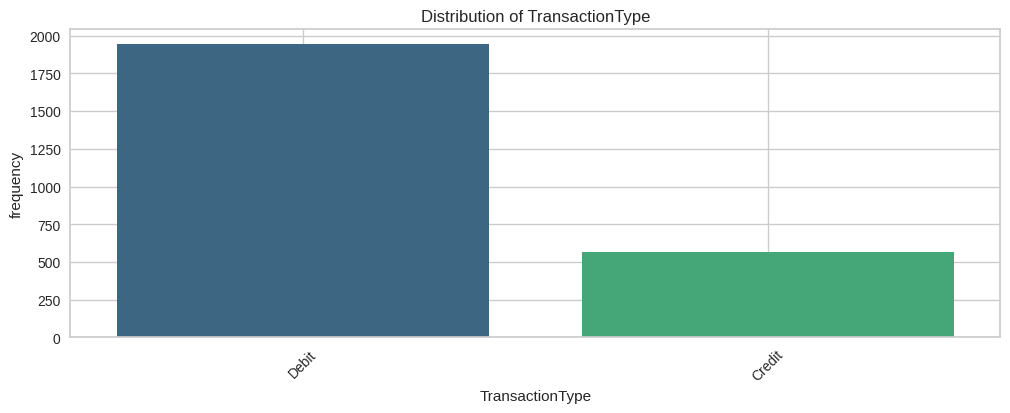

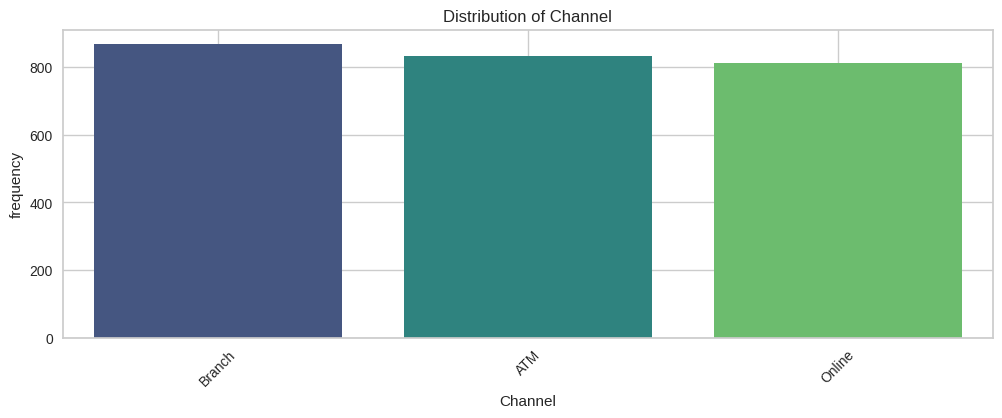

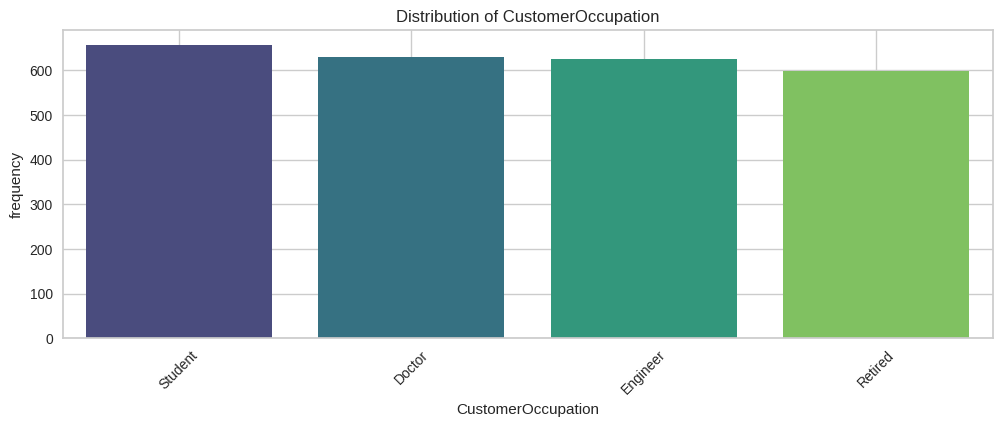

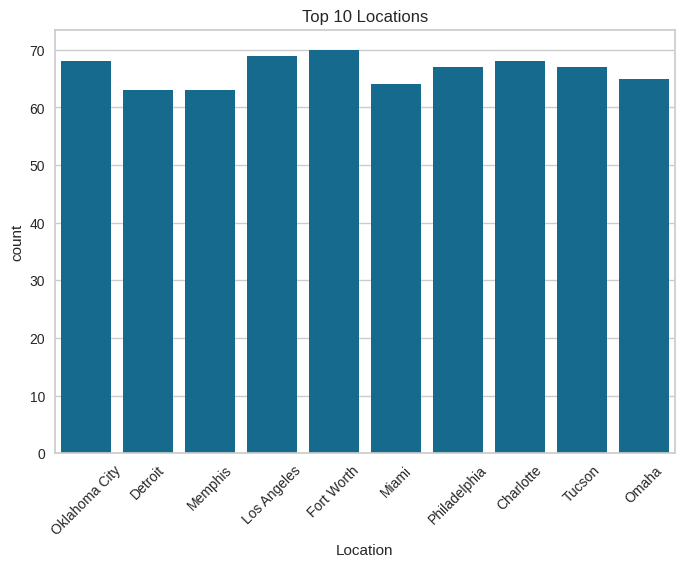

In [8]:
import warnings
warnings.filterwarnings("ignore")

# Mengambil fitur kategorikal 'penting' untuk dianalisis distribusinya
categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation']
for feature in categorical_features:
  plt.figure(figsize=(12,4))
  sns.countplot(x = df[feature], palette = 'viridis', order = df[feature].value_counts().index)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('frequency')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

# Mengambil 10 teratas nilai dari locations
top_locations = df['Location'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Location'].isin(top_locations)], x='Location')
plt.xticks(rotation=45)
plt.title('Top 10 Locations')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [9]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

Mengubah tipe data object "TransactionDate" dan "PreviousTransactionDate" menjadi tipe data datetime agar ketika proses encoding object tidak menghasilkan error/kekeliruan

In [10]:
df_cleaned = df.copy()
numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']

for feature in numeric_features:
  Q1 = df_cleaned[feature].quantile(0.25)
  Q3 = df_cleaned[feature].quantile(0.75)
  IQR = Q3 - Q1
  Lower_bound = Q1 - 1.5 * IQR
  Upper_bound = Q3 + 1.5 * IQR

  df_cleaned = df_cleaned[(df_cleaned[feature] >= Lower_bound) & (df_cleaned[feature] <= Upper_bound)]

  print(f"Jumlah outlier pada kolom {feature}: {len(df.loc[(df[feature] < Lower_bound) | (df[feature] > Upper_bound)])}")


Jumlah outlier pada kolom TransactionAmount: 113
Jumlah outlier pada kolom CustomerAge: 0
Jumlah outlier pada kolom TransactionDuration: 0
Jumlah outlier pada kolom AccountBalance: 0
Jumlah outlier pada kolom LoginAttempts: 122


Melakukan penanganan outlier (outlier handling) dengan metode interquartil (IQR) dimana telah diidentifikasi outlier pada TransactionAmount dan LoginAttempts yang masing-masing sebanyak 113 dan 122 dan Outlier telah berhasil dihapus

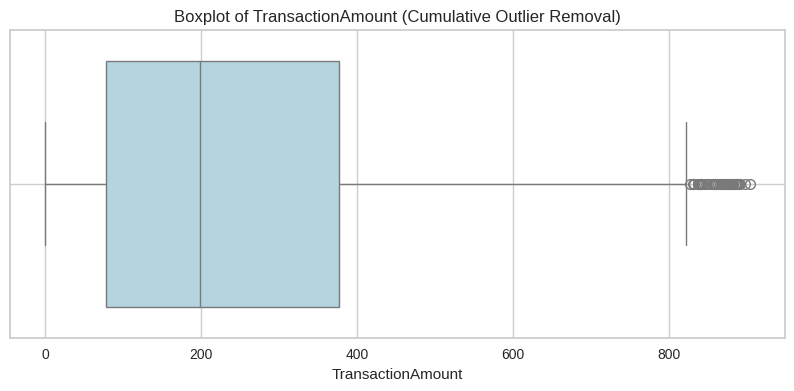

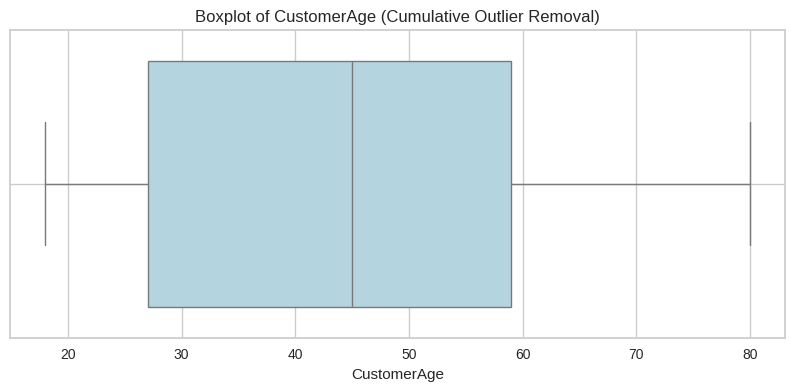

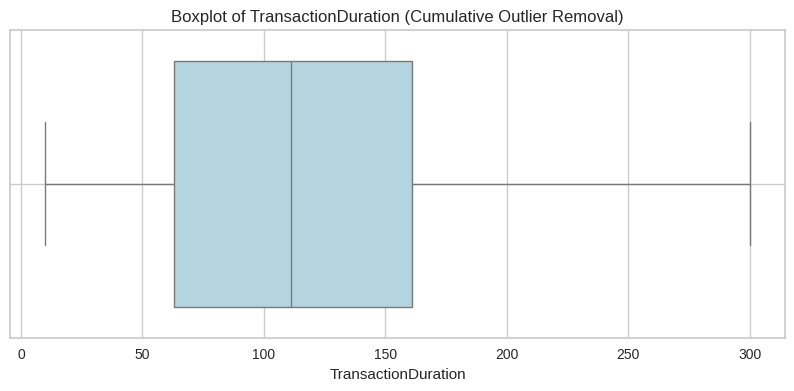

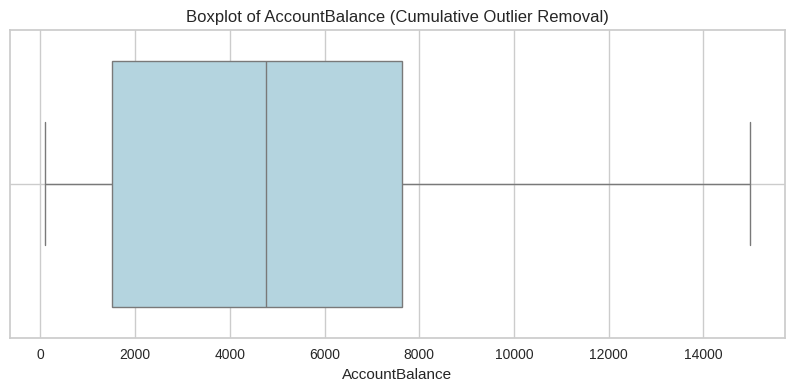

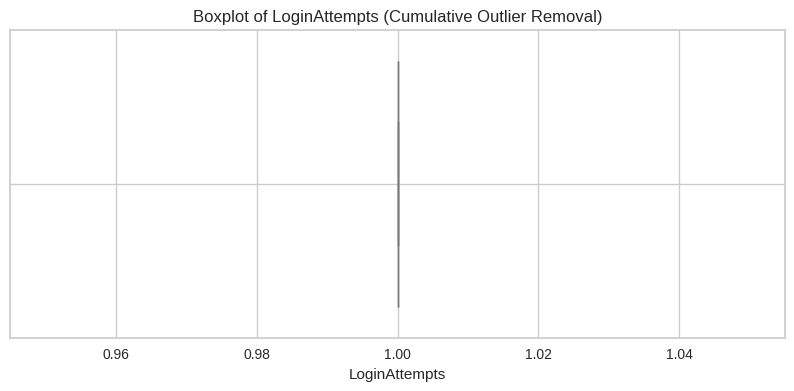

In [11]:
for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_cleaned[feature], color='lightblue')
    plt.title(f'Boxplot of {feature} (Cumulative Outlier Removal)')
    plt.xlabel(feature)
    plt.grid(True)
    plt.show()

In [12]:
# Tahap Encoding
encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(drop=None), categorical_features)], remainder='passthrough')
df_encoded = pd.DataFrame(encoder.fit_transform(df_cleaned), columns = encoder.get_feature_names_out())
df_encoded.head()


,cat__TransactionType_Credit,cat__TransactionType_Debit,cat__Channel_ATM,cat__Channel_Branch,cat__Channel_Online,cat__CustomerOccupation_Doctor,cat__CustomerOccupation_Engineer,cat__CustomerOccupation_Retired,cat__CustomerOccupation_Student,remainder__TransactionID,remainder__AccountID,remainder__TransactionAmount,remainder__TransactionDate,remainder__Location,remainder__DeviceID,remainder__IP Address,remainder__MerchantID,remainder__CustomerAge,remainder__TransactionDuration,remainder__LoginAttempts,remainder__AccountBalance,remainder__PreviousTransactionDate
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,70,81,1,5112.21,2024-11-04 08:08:08
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,68,141,1,13758.91,2024-11-04 08:09:35
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,19,56,1,1122.35,2024-11-04 08:07:04
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,TX000004,AC00070,184.5,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,26,25,1,8569.06,2024-11-04 08:09:06
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,26,198,1,7429.4,2024-11-04 08:06:39


Mentransformasikan fitur kategorikal (TransactionType, Channel, dan CustomerOccupation) yang berkontribusi terhadap modeling. Dengan menggunakan metode OneHotEncoder karena data tersebut bersifat nominal.

In [13]:

# Kolom numerik yang semestinya
numeric_cols = ['remainder__TransactionAmount', 'remainder__CustomerAge',
                'remainder__TransactionDuration', 'remainder__LoginAttempts',
                'remainder__AccountBalance', 'cat__TransactionType_Debit','cat__TransactionType_Credit','cat__Channel_Branch','cat__Channel_Online','cat__Channel_ATM',
                'cat__CustomerOccupation_Engineer','cat__CustomerOccupation_Retired','cat__CustomerOccupation_Student']

# Ubah semua ke float (atau int jika perlu)
for col in numeric_cols:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')  # errors='coerce' akan ubah yang aneh jadi NaN

df_encoded.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   cat__TransactionType_Credit         2282 non-null   float64       
 1   cat__TransactionType_Debit          2282 non-null   float64       
 2   cat__Channel_ATM                    2282 non-null   float64       
 3   cat__Channel_Branch                 2282 non-null   float64       
 4   cat__Channel_Online                 2282 non-null   float64       
 5   cat__CustomerOccupation_Doctor      2282 non-null   object        
 6   cat__CustomerOccupation_Engineer    2282 non-null   float64       
 7   cat__CustomerOccupation_Retired     2282 non-null   float64       
 8   cat__CustomerOccupation_Student     2282 non-null   float64       
 9   remainder__TransactionID            2282 non-null   object        
 10  remainder__AccountID    

In [14]:
# Standarisasi data
numeric_encoded_features = df_encoded.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_array = scaler.fit_transform(numeric_encoded_features)
df_encoded_scaled = pd.DataFrame(scaled_array, columns=numeric_encoded_features.columns)

df_encoded_scaled.head()


,cat__TransactionType_Credit,cat__TransactionType_Debit,cat__Channel_ATM,cat__Channel_Branch,cat__Channel_Online,cat__CustomerOccupation_Engineer,cat__CustomerOccupation_Retired,cat__CustomerOccupation_Student,remainder__TransactionAmount,remainder__CustomerAge,remainder__TransactionDuration,remainder__LoginAttempts,remainder__AccountBalance
0,-0.541896,0.541896,1.429219,-0.733305,-0.688593,-0.576338,-0.561492,-0.595233,-1.108794,1.429702,-0.543725,0.0,-0.001892
1,-0.541896,0.541896,1.429219,-0.733305,-0.688593,-0.576338,-0.561492,-0.595233,0.554382,1.316759,0.315402,0.0,2.226312
2,-0.541896,0.541896,-0.699683,-0.733305,1.452237,-0.576338,-0.561492,1.680014,-0.593515,-1.450340,-0.901695,0.0,-1.030055
3,-0.541896,0.541896,-0.699683,-0.733305,1.452237,-0.576338,-0.561492,1.680014,-0.326185,-1.055040,-1.345577,0.0,0.888919
4,1.845374,-1.845374,-0.699683,-0.733305,1.452237,-0.576338,-0.561492,1.680014,-1.111734,-1.055040,1.131573,0.0,0.595235


Melakukan tahap standarisasi data pada kolom/fitur numerik dan juga yang telah di encoding

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

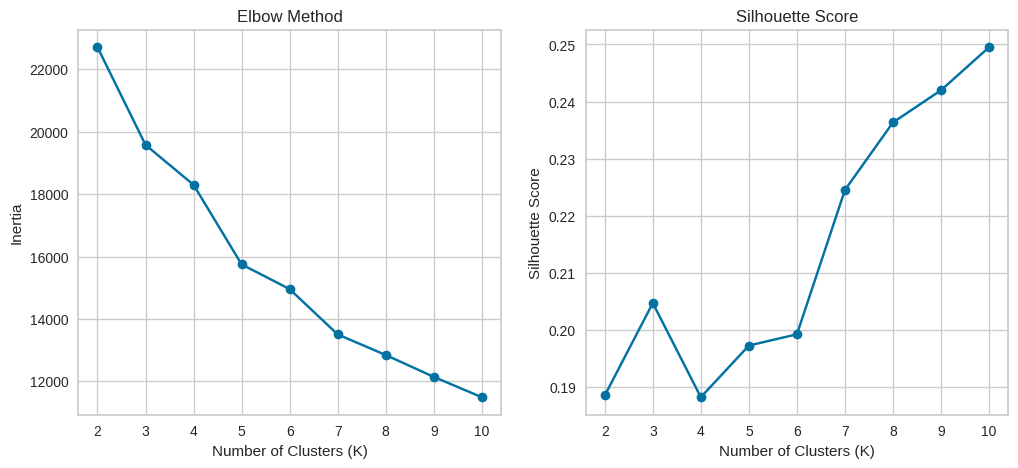

In [15]:
# Menentukan K yang optimal dari metode elbow method dan silhouette score
inertia = []
sil_score =[]
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded_scaled)
    inertia.append(kmeans.inertia_)
    sil_score.append(silhouette_score(df_encoded_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))
# plot elbow
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# plot silhouette score
plt.subplot(1, 2, 2)
plt.plot(k_values, sil_score, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

Jika dilihat dari hasil evaluasi kedua metode diatas, hasil elbow method menunjukkan cluster yang ideal pada K=3 dan K=5. Sedangkan pada silhouette score menunjukkan cluster terbaik pada K=3 karena merupakan maksimum lokalnya. Jika ditarik kesimpulan maka cluster (K) = 3 lah yang ideal karena high correlated pada kedua metode tersebut.

## **b. Evaluasi Model Clustering**

In [16]:
score = silhouette_score(df_encoded_scaled, kmeans.labels_)
print(f'Silhouette score: {score}')

Silhouette score: 0.2495161862402067


## **c. Final Model**

In [17]:
# Fit KMeans pada data yang sudah di-encode & scale
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_final.fit(df_encoded_scaled)

# Buat DataFrame baru yang HANYA berisi data yang dipakai modeling
df_for_analysis = df.loc[df_encoded_scaled.index].copy()  # Align dengan index yang sama
df_for_analysis['Cluster'] = kmeans_final.labels_

# Analisis
print(df_for_analysis.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'median', 'std'],
    'CustomerAge': 'mean',
    'LoginAttempts': 'mean',
    'AccountBalance': 'mean',
    'Channel': lambda x: x.mode()[0],  # Most common channel
    'TransactionType': lambda x: x.mode()[0]
}))

        TransactionAmount                     CustomerAge LoginAttempts  \
                     mean  median         std        mean          mean   
Cluster                                                                   
0              278.638846  200.41  259.490762   44.019231      1.121795   
1              305.406998  210.61  309.091430   44.902778      1.129630   
2              291.555598  206.83  279.843400   45.523166      1.123552   

        AccountBalance  Channel TransactionType  
                  mean <lambda>        <lambda>  
Cluster                                          
0          5034.993141   Branch           Debit  
1          5080.795910   Branch           Debit  
2          5256.401622      ATM           Debit  


## **Create ulang model clustering dengan DBSCAN**

In [18]:
# DBSCAN model (lama)
dbscan = DBSCAN(eps=0.78, min_samples=40)
labels_dbscan = dbscan.fit_predict(df_encoded_scaled)

# Simpan label
df_encoded_scaled['Cluster_DBSCAN'] = labels_dbscan

# Hitung silhouette score
mask = labels_dbscan != -1
if mask.sum() > 1:
    score = silhouette_score(df_encoded_scaled.loc[mask], labels_dbscan[mask])
    print(f"Silhouette Score DBSCAN (tanpa outlier): {score}")
else:
    print("Terlalu banyak outlier, silhouette score tidak bisa dihitung.")

Silhouette Score DBSCAN (tanpa outlier): 0.7545078074939212


In [19]:
labels = dbscan.labels_
unique_labels, counts = np.unique(labels, return_counts=True)
print("\nJumlah titik di setiap klaster:")
for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"Noise (label -1): {count} titik")
    else:
        print(f"Klaster {label}: {count} titik")


Jumlah titik di setiap klaster:
Noise (label -1): 2103 titik
Klaster 0: 59 titik
Klaster 1: 66 titik
Klaster 2: 54 titik


Karena algoritma model kmeans tidak menunjukkan hasil yang baik terhadap klasterisasi data, kami mencoba membuat model algoritma lain yaitu DBSCAN yang concern terhadap titik outlier pada dataset. Kemudian hasil evaluasi menunjukkan performa model yang baik yaitu sekitar 0.7. Jadi pada hasil clusternya menunjukkan bahwa cluster -1 terdiri dari sekitar 90% mayoritas data, jadi hipotesisnya adalah cluster -1 itu data normal atau tidak fraud.

## **Analisis Deskriptif**

In [20]:
# Align cluster ke df raw untuk dianalisis tiap fiturnya
df_dbscan = df.loc[df_encoded_scaled.index].copy()
df_dbscan['Cluster_DBSCAN'] = labels
df_dbscan.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster_DBSCAN
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,-1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,-1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,-1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,-1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,-1


In [21]:
# Analisis per klaster
for cluster_idx in df_dbscan['Cluster_DBSCAN'].unique():
    if cluster_idx == -1:
        print("NOISE/NORMAL TRANSACTION (-1)")
    else:
        print(f"ANOMALY CLUSTER {cluster_idx}")

    cluster_data = df_dbscan[df_dbscan['Cluster_DBSCAN'] == cluster_idx]
    print(f"Total: {len(cluster_data)} Transaction ({len(cluster_data)/len(df_dbscan)*100:.2f}%)")

    print(f"Transaction Amount: ")
    print(f"  Mean: ${cluster_data['TransactionAmount'].mean():.2f}")
    print(f"  Median: ${cluster_data['TransactionAmount'].median():.2f}")
    print(f"  Min: ${cluster_data['TransactionAmount'].min():.2f}")
    print(f"  Max: ${cluster_data['TransactionAmount'].max():.2f}")
    print(f"  Std: ${cluster_data['TransactionAmount'].std():.2f}")

    print(f"\nAccount Balance:")
    print(f"  Mean: ${cluster_data['AccountBalance'].mean():.2f}")
    print(f"  Median: ${cluster_data['AccountBalance'].median():.2f}")

    print(f"Login Attempts:")
    print(f"  Mean: {cluster_data['LoginAttempts'].mean():.2f}")
    print(f"  Median: {cluster_data['LoginAttempts'].median():.2f}")
    print(f"  Max: {cluster_data['LoginAttempts'].max():.0f}")

    print(f"\nTransaction Duration (minutes):")
    print(f"  Mean: {cluster_data['TransactionDuration'].mean():.2f}")
    print(f"  Median: {cluster_data['TransactionDuration'].median():.2f}")

    print(f"\nCustomer Age:")
    print(f"  Mean: {cluster_data['CustomerAge'].mean():.1f}")

    print("\n--- Channel Distribution ---")
    print(cluster_data['Channel'].value_counts())
    print("Percentage:")
    print(cluster_data['Channel'].value_counts(normalize=True).apply(lambda x: f"{x*100:.1f}%"))

    print("\n--- Transaction Type ---")
    print(cluster_data['TransactionType'].value_counts())
    print("Percentage:")
    print(cluster_data['TransactionType'].value_counts(normalize=True).apply(lambda x: f"{x*100:.1f}%"))

    print("\n--- Customer Occupation ---")
    print(cluster_data['CustomerOccupation'].value_counts())

NOISE/NORMAL TRANSACTION (-1)
Total: 2103 Transaction (92.16%)
Transaction Amount: 
  Mean: $300.55
  Median: $207.71
  Min: $0.26
  Max: $1919.11
  Std: $297.92

Account Balance:
  Mean: $5147.15
  Median: $4735.61
Login Attempts:
  Mean: 1.12
  Median: 1.00
  Max: 5

Transaction Duration (minutes):
  Mean: 120.17
  Median: 114.00

Customer Age:
  Mean: 44.9

--- Channel Distribution ---
Channel
Branch    729
ATM       693
Online    681
Name: count, dtype: int64
Percentage:
Channel
Branch    34.7%
ATM       33.0%
Online    32.4%
Name: proportion, dtype: object

--- Transaction Type ---
TransactionType
Debit     1632
Credit     471
Name: count, dtype: int64
Percentage:
TransactionType
Debit     77.6%
Credit    22.4%
Name: proportion, dtype: object

--- Customer Occupation ---
CustomerOccupation
Student     537
Doctor      528
Engineer    524
Retired     514
Name: count, dtype: int64
ANOMALY CLUSTER 1
Total: 66 Transaction (2.89%)
Transaction Amount: 
  Mean: $259.86
  Median: $207.14
 

In [23]:
# Komparasi fitur numerik klaster normal vs anomaly
anomalies = df_dbscan[df_dbscan['Cluster_DBSCAN'] != -1]
normal = df_dbscan[df_dbscan['Cluster_DBSCAN'] == -1]

print("PERBANDINGAN CLUSTER DATA ANOMALI VS NORMAL")

comp_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
for feature in comp_features:
    print(f"\n{feature}:")
    print(f" Normal  - Mean: {normal[feature].mean():.2f}, Median: {normal[feature].median():.2f}")
    print(f" Anomaly - Mean: {anomalies[feature].mean():.2f}, Median: {anomalies[feature].median():.2f}")
    print(f"  Difference: {((anomalies[feature].mean() / normal[feature].mean() - 1) * 100):.1f}%")

PERBANDINGAN CLUSTER DATA ANOMALI VS NORMAL

TransactionAmount:
 Normal  - Mean: 300.55, Median: 207.71
 Anomaly - Mean: 252.35, Median: 207.47
  Difference: -16.0%

CustomerAge:
 Normal  - Mean: 44.91, Median: 46.00
 Anomaly - Mean: 44.30, Median: 47.00
  Difference: -1.4%

TransactionDuration:
 Normal  - Mean: 120.17, Median: 114.00
 Anomaly - Mean: 122.35, Median: 116.00
  Difference: 1.8%

LoginAttempts:
 Normal  - Mean: 1.12, Median: 1.00
 Anomaly - Mean: 1.16, Median: 1.00
  Difference: 3.4%

AccountBalance:
 Normal  - Mean: 5147.15, Median: 4735.61
 Anomaly - Mean: 4689.61, Median: 4474.20
  Difference: -8.9%


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

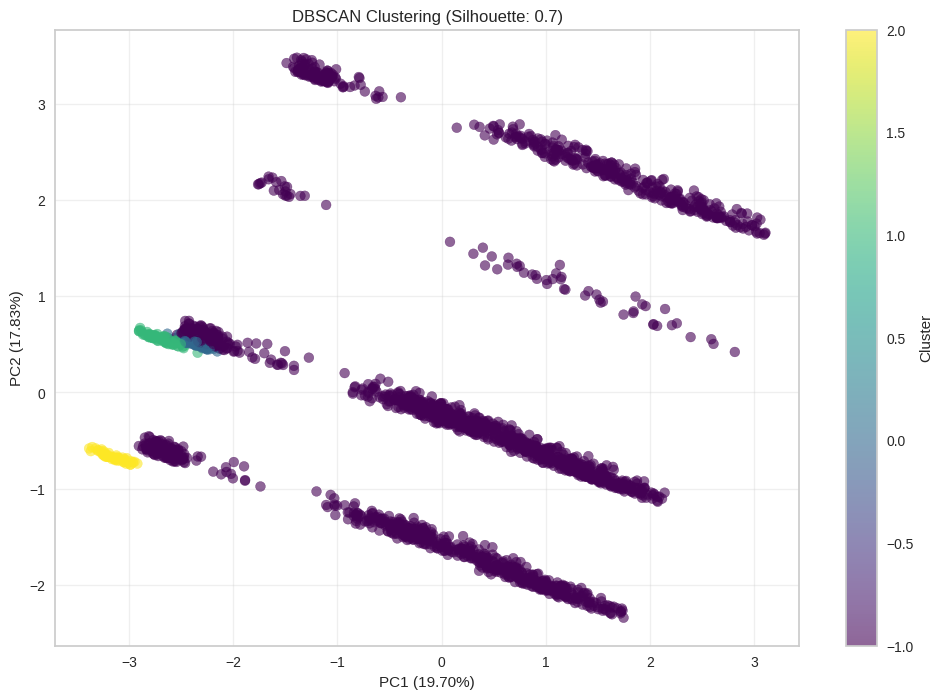

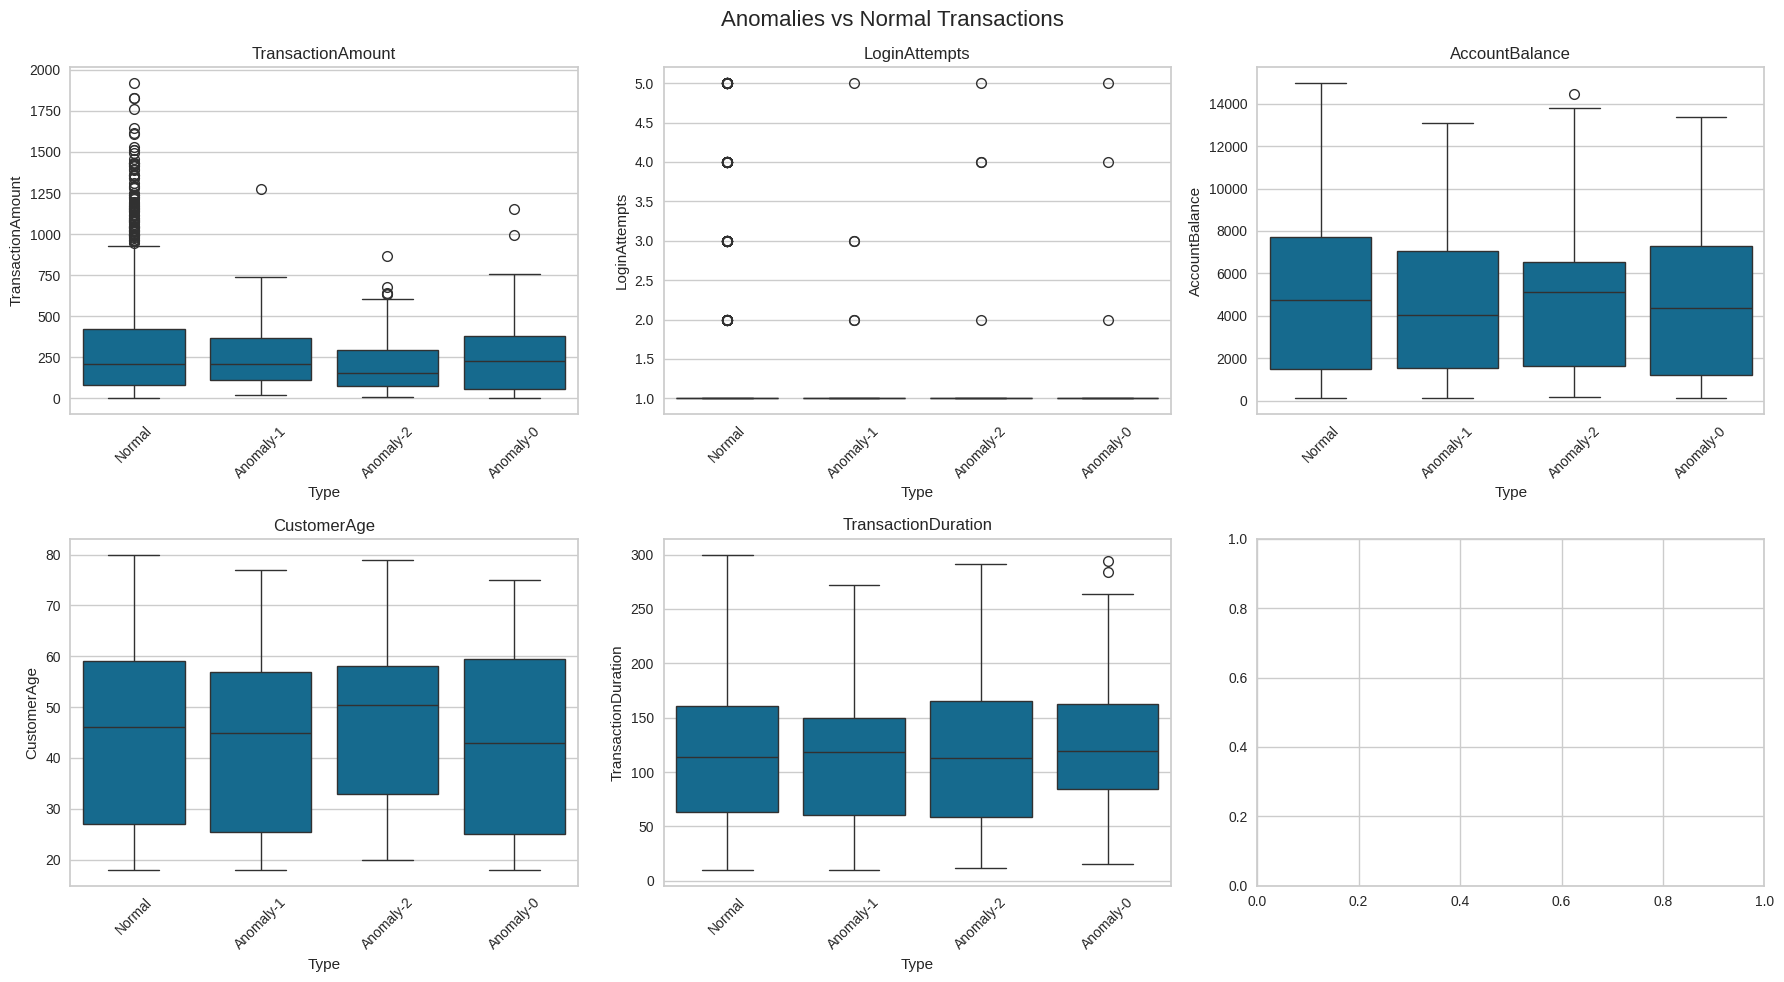

In [25]:
# Visualiasasi dengan PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_encoded_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1],
                     c=dbscan.labels_, cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.title('DBSCAN Clustering (Silhouette: 0.7)')
plt.grid(alpha=0.3)
plt.show()

# Boxplot comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Anomalies vs Normal Transactions', fontsize=16)

features_to_plot = ['TransactionAmount', 'LoginAttempts', 'AccountBalance',
                    'CustomerAge', 'TransactionDuration']

for idx, feature in enumerate(features_to_plot):
    row = idx // 3
    col = idx % 3

    # Prepare data: Normal vs Anomalies
    plot_data = df_dbscan.copy()
    plot_data['Type'] = plot_data['Cluster_DBSCAN'].apply(
        lambda x: 'Normal' if x == -1 else f'Anomaly-{x}'
    )

    sns.boxplot(data=plot_data, x='Type', y=feature, ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Jika dilihat dari visualisasi PCA nya sudah terklasterisasi dengan baik dari tiap definisi klaster (Anomaly dengan Normal). Sekarang mari kita breakdown dan lihat hasil visualisasi boxplotnya:
1. Transaction Amount

Data transaksi normal dengan anomali cenderung sama untuk tiap median nya, besaran jumlah transaksi pun tidak menunjukkan overlap yang sangat besar. Tetapi data transaksi normal sangat banyak outliernya. Tentunya Fitur Transaction Amount tidak bisa menjadi sinyal pembeda fraud dan tidak fraud.

2. Login Attempt

Fitur Login Attempt tidak dapat memberikan dengan jelas sinyal pembeda fraud dan tidak fraud jika dilihat median dan range semua klaster nya berada di 1 semua, dan semua klaster memiliki outlier yang serupa.

3. Account Balance

Klaster Anomaly-2 memiliki median yang cukup tinggi dibandingkan 3 klaster lainnya (>$5500) dan juga memiliki outlier. Kemungkinan klaster Anomaly-2 adalah sinyal/faktor fraud.

4. Customer Age

Usia Customer tidak memiliki sinyal pembeda, terlihat distribusinya hampir sama untuk semua klaster.

5. Transaction Duration

Transaction Duration memiliki sinyal pembeda di klaster anomaly-0, terlihat ada outlier di sekitar 300 menit (5 jam), transaksi yang lama menjadi sinyal potensi fraud.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [26]:
#cek dataframe saat ini
df_export = df_dbscan.copy()
print(df_export.columns)

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'Cluster_DBSCAN'],
      dtype='object')


In [27]:
#Simpan ke CSV dan ke Drive

df_export.to_csv('/content/drive/MyDrive/Submission Dicoding/hasil_clustering_frauds_detection.csv', index = False)